In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.metrics.cluster import adjusted_rand_score

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

import time

In [3]:
def df2array(df):
    # 将数据以 ndarray 的形式读入内存
    # [[x1,x2,...,x500,y1,y2,...,y500],[],...]
    i = 0
    data = np.array([])
    while i <= len(df)-1:
        arr_x = np.array(df['x'][i:i+POINTS_NUM_PER_TR])
        arr_y = np.array(df['y'][i:i+POINTS_NUM_PER_TR])
        arr = np.append(arr_x,arr_y)
        if len(data)==0:
            data = np.array([arr])
        else:
            data = np.append(data,[arr],axis=0)
        i+=POINTS_NUM_PER_TR
    return data

In [4]:
POINTS_NUM_PER_TR = 500

df = pd.read_csv('./all.csv')

NUM_TR = int(len(df)/POINTS_NUM_PER_TR)

In [5]:
NUM_TR

2097

In [6]:
data = df2array(df)

In [20]:
L = []
N = 10
for i in range(len(data)):
    count = 0
    x = data[i][:500]
    first_x = x[0]
    last_x = x[-1]
    signal = last_x - first_x
    for j in range(1,500,1):
        if (x[j] - x[j-1])*signal < 0:
            count = count+1
    if count <= N:
        L.append(i)

In [21]:
len(L)

532

In [22]:
ids = list(df['person_id'])

In [23]:
TF = []
for i in range(len(ids)):
    TF.append(ids[i] in L)

In [24]:
df[TF]

,person_id,x,y
500,1,1.239,8.618
501,1,1.256,8.578
502,1,1.261,8.494
503,1,1.243,8.406
504,1,1.228,8.297
...,...,...,...
1047495,2094,15.994,-10.191
1047496,2094,15.966,-10.127
1047497,2094,15.914,-10.071
1047498,2094,15.858,-10.019


In [25]:
clean_df = df[TF]

In [26]:
DATA = df2array(clean_df
               )

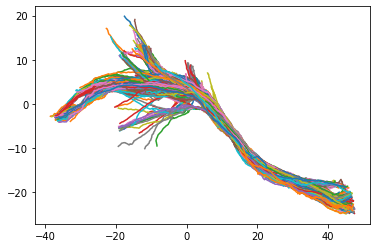

In [28]:
for i in range(len(DATA)):
    x = DATA[i][:POINTS_NUM_PER_TR]
    y = DATA[i][POINTS_NUM_PER_TR:]
    plt.plot(x,y)
plt.show()

In [29]:
df1= clean_df[:177*500]

In [30]:
df2 = clean_df[177*500:177*500+177*500]

In [31]:
df3 = clean_df[177*500+177*500: ]

In [32]:
df1.to_csv('clean_node1.csv')

In [33]:
df2.to_csv('clean_node2.csv')

In [34]:
df3.to_csv('clean_node3.csv')

In [35]:
clean_df.to_csv('clean_all.csv')